David Omrai
20.3.2022

Data a parametry
Každý z datových souborů reprezentuje prvních cca 1000 slov nějaké anglické knihy.

!  V prvním řádku se vždy nachází informace o knize a autorovi  (tanto řádek pro analýzu ignorujte).

! V některých textech se nevyskytují všechny znaky anglické abecedy. To může být pro některé úlohy problém a je třeba se k němu postavit čelem! Může pomoct prohození souborů (tj. označení první a druhy), nebo přidání nevyskytujícího se znaku s nulovou pravděpodobností.


Zadání úlohy
1) Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte pravděpodobnosti znaků (symbolů všetně mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte. 
2) Pro každý text zvlášť spočtěte entropii odhadnutého rozdělení znaků.
3) Nalezněte optimální binární instantní kód C pro kódování znaků prvního z textů.
4) Pro každý text zvlášť spočtěte střední délku kódu C a porovnejte ji s entropií rozdělení znaků. Je kód C optimální i pro druhý text?

In [12]:
# Libraries
import scipy
import numpy
import matplotlib.pyplot as plt

In [13]:
# Load proper data file
# day of birth
K = 9
# last name length
L = len("Omrai")
X = ((K*L*23) % (20)) + 1
Y  = ((X + ((K*5 + L*7) % (19))) % (20)) + 1

file_name_x = f"{X:0=3d}.txt"
file_name_y = f"{Y:0=3d}.txt"
file_loc = "../hw1-source"

def read_file(file_path):
    with open(file_path, 'r') as file:
        return file.read()

file_x = read_file("{}/{}".format(file_loc, file_name_x))
file_y = read_file("{}/{}".format(file_loc, file_name_y))

data_x = {}
data_y = {}

data_x["name"] = file_x.partition('\n')[0]
data_x["text"] = file_x[len(data_x["name"])+1:].strip().replace('\n', ' ')

data_y["name"] = file_y.partition('\n')[0]
data_y["text"] = file_y[len(data_y["name"])+1:].strip().replace('\n', ' ')

In [14]:
#1

# get just unique characters from texts
# uniq_chars_x = ''.join(set(data_x["text"]))
# uniq_chars_y = ''.join(set(data_y["text"]))

In [15]:
# Count the characters occurrence
def count_characters(text):
    chars_num = {}
    for i in text:
        if i not in chars_num.keys():
            chars_num[i] = {}
            chars_num[i]["num"] = 1
        else:
            chars_num[i]["num"] += 1

    text_len = len(text)
    for i in chars_num.keys():
        chars_num[i]["prob"] = chars_num[i]["num"] / text_len

    return chars_num

In [16]:
uniq_num_x = count_characters(data_x["text"])
uniq_num_y = count_characters(data_y["text"])

In [17]:
print(uniq_num_x.keys())
print(uniq_num_y.keys())

dict_keys(['t', 'h', 'e', ' ', 'r', 'p', 'u', 'b', 'l', 'i', 'c', 's', 'o', 'n', 'f', 'd', 'a', 'g', 'w', 'm', 'y', 'k', 'v', 'q', 'j', 'x'])
dict_keys(['t', 'h', 'e', ' ', 'c', 'i', 'l', 'd', 'r', 'n', 'a', 'm', 'p', 'o', 'f', 's', 'u', 'g', 'b', 'y', 'w', 'v', 'k', 'q', 'j', 'x', 'z'])


In [18]:
# Add the rest of english characters
eng_chars = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

def add_missing_chars(chars, uniq_dict):
    for char in chars:
        if (char not in uniq_dict.keys()):
            uniq_dict[char] = {}
            uniq_dict[char]["num"] = 0
            uniq_dict[char]["prob"] = 0.0

add_missing_chars(eng_chars, uniq_num_x)
add_missing_chars(eng_chars, uniq_num_y)

add_missing_chars(uniq_num_x.keys(), uniq_num_y)
add_missing_chars(uniq_num_y.keys(), uniq_num_x)



In [19]:
# Plot the probabilities
names_x = list(uniq_num_x.keys())
values_x = list(value["prob"] for value in uniq_num_x.values())
names_y = list(uniq_num_y.keys())
values_y = list(value["prob"] for value in uniq_num_y.values())

Text(0.5, 0.98, 'Symbols probabilities')

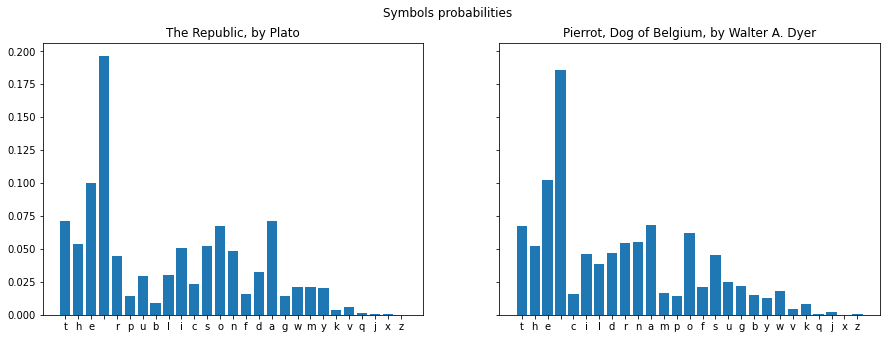

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axs[0].bar(names_x, values_x)
axs[0].title.set_text(data_x["name"])
axs[1].bar(names_y, values_y)
axs[1].title.set_text(data_y["name"])
fig.suptitle('Symbols probabilities')

In [37]:
# Entrophy
def get_entrophy(probs):
    sum = 0
    for prob in probs:
        if prob != 0.0:
            sum += prob*numpy.log2(prob) # bits
    return -sum

In [38]:
print(get_entrophy([value["prob"] for value in uniq_num_x.values()]))
print(get_entrophy([value["prob"] for value in uniq_num_y.values()]))

4.041276204320588
4.0946897287085235
